In [1]:
from requests import get
page1_url = 'https://www.capterra.com.au/reviews/111640/cashflow-manager'
page1_response = get(page1_url)
page2_url = 'https://www.capterra.com.au/reviews/111640/cashflow-manager?page=2'
page2_response = get(page1_url)

In [2]:
from bs4 import BeautifulSoup
page1_html_soup = BeautifulSoup(page1_response.text, 'html.parser')
page2_html_soup = BeautifulSoup(page2_response.text, 'html.parser')

In [3]:
page1_containers = page1_html_soup.find_all('div', class_ = 'i18n-translation_container review-card pt-4 py-3 py-md-5 border-bottom border-primary')
page2_containers = page2_html_soup.find_all('div', class_ = 'i18n-translation_container review-card pt-4 py-3 py-md-5 border-bottom border-primary')


In [4]:
# occurrence = 2

# # Finding nth occurrence of substring
# val = -1
# for i in range(0, occurrence):
#     val = str(first_review).find('span', val + 1)
       
# # Printing nth occurrence
# print ("Nth occurrence is at", val)

In [5]:
# Lists to store the scraped data in
reviewer_names = []
overall_ratings = []
ease_ratings = []
function_ratings = []
customer_support_ratings = []
value_ratings = []
comment_headings = []
actual_comments = []
positives = []
negatives = []

# Extract data from individual container
for container in page1_containers:
    
    # Reviewer Name
    name = container.h5.text.replace('\n','').replace('    ','')
    reviewer_names.append(name)
    
    # Overall Rating
    overall = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[0].text.replace('\n','').replace(' ','').replace('/5',''))
    overall_ratings.append(overall)
    
    # Ease of Use Rating
    ease = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[1].text.replace('\n','').replace(' ','').replace('/5',''))
    ease_ratings.append(ease)
    
    # Features and Functions Ratings
    function = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[2].text.replace('\n','').replace(' ','').replace('/5',''))
    function_ratings.append(function)
    
    # Customer Support Ratings
    try:
        support = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[3].text.replace('\n','').replace(' ','').replace('/5',''))
        customer_support_ratings.append(support)
    except:
        customer_support_ratings.append('')
        
    # Value for Money Ratings
    try:
        value = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[4].text.replace('\n','').replace(' ','').replace('/5',''))
        value_ratings.append(value)
    except:
        value_ratings.append('')
    
    # Comment Heading
    heading = container.h3.text.replace('"','')
    comment_headings.append(heading)
    
    # Actual Comment
    comment = container.find_all('span')[-5].text
    actual_comments.append(comment)
    
    # Positive Note
    positive_note = container.find_all('span')[-4].text
    positives.append(positive_note)
    
    # Negative Note
    negative_note = container.find_all('span')[-3].text
    negatives.append(negative_note)

for container in page2_containers:
    
    # Reviewer Name
    name = container.h5.text.replace('\n','').replace('    ','')
    reviewer_names.append(name)
    
    # Overall Rating
    overall = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[0].text.replace('\n','').replace(' ','').replace('/5',''))
    overall_ratings.append(overall)
    
    # Ease of Use Rating
    ease = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[1].text.replace('\n','').replace(' ','').replace('/5',''))
    ease_ratings.append(ease)
    
    # Features and Functions Ratings
    function = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[2].text.replace('\n','').replace(' ','').replace('/5',''))
    function_ratings.append(function)
    
    # Customer Support Ratings
    try:
        support = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[3].text.replace('\n','').replace(' ','').replace('/5',''))
        customer_support_ratings.append(support)
    except:
        customer_support_ratings.append('')
        
    # Value for Money Ratings
    try:
        value = int(container.find_all('span', class_ = 'text-nowrap d-inline-block text-right review-stars__text font-weight-bold')[4].text.replace('\n','').replace(' ','').replace('/5',''))
        value_ratings.append(value)
    except:
        value_ratings.append('')
    
    # Comment Heading
    heading = container.h3.text.replace('"','')
    comment_headings.append(heading)
    
    # Actual Comment
    comment = container.find_all('span')[-5].text
    actual_comments.append(comment)
    
    # Positive Note
    positive_note = container.find_all('span')[-4].text
    positives.append(positive_note)
    
    # Negative Note
    negative_note = container.find_all('span')[-3].text
    negatives.append(negative_note)

In [6]:
import pandas as pd
df = pd.DataFrame({'Reviewer_Names': reviewer_names,
                   'Overall_Ratings': overall_ratings,
                   'Ease_Of_Use_Ratings': ease_ratings,
                   'Functionality_Ratings': function_ratings,
                   'Customer_Support_Ratings': customer_support_ratings,
                   'Value_For_Money_Ratings': value_ratings,
                   'Comment_Headings': comment_headings,
                   'Actual_Comments': actual_comments,
                   'Postive_Notes': positives,
                   'Negative_Note': negatives
                   })
df = df.drop_duplicates()
df.head(3)

,Reviewer_Names,Overall_Ratings,Ease_Of_Use_Ratings,Functionality_Ratings,Customer_Support_Ratings,Value_For_Money_Ratings,Comment_Headings,Actual_Comments,Postive_Notes,Negative_Note
0,Warren R.,3,4,3,1,1,Worked well for a number of years but earlier ...,\n\n\n\n,"For a simple business, Cashflow Manager Gold w...","Perhaps, with cost being a factor in our initi..."
1,Peter S.,3,3,3,1,3,Beware of This Company,Very bad experience dealing with a disreputabl...,I bought this software several years ago after...,Be prepared to be harassed by this company. Af...
2,Russell H.,3,3,3,1,1,Very disappointed,I used Cashflow Manager for many years without...,Was fairly easy to use and my accountant was a...,They implemented yearly subscription fees afte...


In [7]:
df.to_excel("reviews.xlsx")

In [8]:
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
def process_text(comment):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', comment)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [11]:
processed = []
for each_comment in df['Actual_Comments'].tolist():
    processed.append(process_text(each_comment))
processed = [item for sublist in processed for item in sublist]

In [12]:
# Import Counter
from collections import Counter

# Get bigram count
bigram_counts = Counter(ngrams(processed, n=2))
# print(dict(bigram_counts))

# Print top x bigrams
print(dict(bigram_counts.most_common(10)))

{('cashflow', 'manager'): 4, ('customer', 'service'): 3, ('sensitive', 'content'): 3, ('content', 'hidden'): 3, ('never', 'get'): 2, ('service', 'wa'): 2, ('call', 'wa'): 2, ('using', 'product'): 2, ('happy', 'service'): 2, ('book', 'keeping'): 2}


In [13]:
# Get word counts
word_counts = Counter(processed)
#print(dict(word_counts))

# Get top x words
print(dict(word_counts.most_common(20)))

{'wa': 15, 'product': 6, 'customer': 6, 'support': 6, 'service': 6, 'cashflow': 5, 'call': 5, 'manager': 4, 'pay': 4, 'good': 4, 'email': 4, 'get': 4, 'old': 4, 'subscription': 4, 'business': 4, 'never': 4, 'happy': 4, 'put': 3, 'year': 3, 'without': 3}


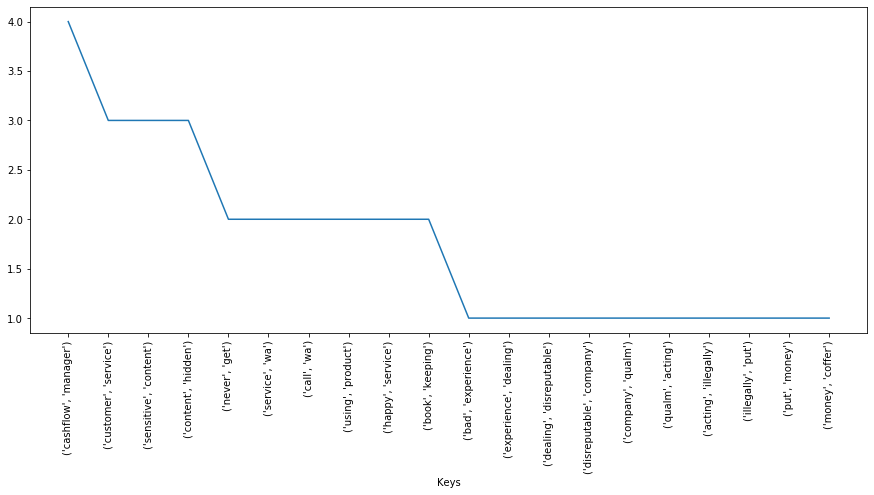

In [14]:
import matplotlib.pyplot as plt
keys = dict(bigram_counts.most_common(20)).keys()
values = dict(bigram_counts.most_common(20)).values()
bigram_df = pd.DataFrame({'Keys':keys,
                          'Values':values})
fig, ax = plt.subplots()
bigram_df.plot(kind='line',x='Keys',y='Values',figsize=(15,6),legend=False,ax=ax);
ax.set_xticks(range(len(bigram_df.Keys)));
ax.set_xticklabels(bigram_df.Keys.values.tolist(), rotation=90);

In [15]:
bigram_df.to_excel("bigrams.xlsx", index=False)